# **0 - HELPERS**

## 0.1 - Libraries

*Import required libraries*

In [1]:
# don't cache libraries (especially project library)
%load_ext autoreload
%autoreload 2

In [2]:
# setup and environment
import os
from   pathlib import Path

# data manipulation
import re
import numpy as np
import pandas as pd

# dataframe summary
from ydata_profiling import ProfileReport

# plots
import seaborn as sns
import matplotlib.pyplot as plt

# notebooks
from IPython.display import display, HTML

/home/ds-gustavo-cunha/.pyenv/versions/omdena_sp_train/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 0.2 - Setup

*Define basic configurations*

In [3]:
#####################
# pandas dataframes #
#####################

# set cientific notation for pandas
pd.set_option(
    "display.float_format", "{:,.3f}".format
)  # used in some places like SeriesFormatter
pd.set_option(
    "display.precision", 3
)  # for regular formatting as well as scientific notation
pd.set_option(
    "styler.format.precision", 3
)  # The precision for floats and complex numbers
# don't truncate columns
pd.set_option("display.max_colwidth", 100)  # None for unlimited
# display all columns
pd.set_option("display.max_columns", None)
# display up to 100 rows
pd.set_option("display.max_rows", 100)
# display dimensions
pd.set_option("display.show_dimensions", True)
# define decimals and thousand separation
pd.set_option("styler.format.decimal", ",")
pd.set_option("styler.format.thousands", ".")

####################
# matplotlib plots #
####################

# set default plt figure size
plt.rcParams["figure.figsize"] = [10, 5]
# figure suptitle
plt.rcParams["figure.titlesize"] = "large"
plt.rcParams["figure.titleweight"] = "bold"
# set default plt font size
plt.rcParams["font.size"] = 24
# font weight
# plt.rcParams["font.weight"] = "bold"
# title location
plt.rcParams["axes.titlelocation"] = "left"
# title size
plt.rcParams["axes.titlesize"] = "large"
# title wight
plt.rcParams["axes.titleweight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
# spines
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
# axis labels
plt.rcParams["xaxis.labellocation"] = "left"
plt.rcParams["yaxis.labellocation"] = "top"
# figure layout
plt.rcParams["figure.autolayout"] = False
# save figures
plt.rcParams["savefig.dpi"] = 900
plt.rcParams["savefig.facecolor"] = "white"
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["savefig.format"] = "png"

# set fivethirtyeight pallete
plt.style.use("fivethirtyeight")

#####################
# jupyter notebooks #
#####################

# set cell size to be expanded
display(HTML("<style>.container { width:100% !important; }</style>"))

## 0.4 - Constants

*Define reusuable constants*

In [4]:
# define the project root path that will be the "baseline" for all paths in the notebook
PROJECT_ROOT_PATH = Path.cwd().parent.parent.parent
PROJECT_ROOT_PATH

PosixPath('/home/ds-gustavo-cunha/Projects/omdena_sp_train')

In [5]:
# define war data folder path
RAW_DATA_PATH = os.path.join(PROJECT_ROOT_PATH, "src", "tasks", "task_1_data_collection_preprocessing", "final_datasets")

# inspect folder
os.listdir(RAW_DATA_PATH)

['l01_pes_complete.csv',
 'README.md',
 'publiclines_pel_complete.csv',
 'alllines_pes_complete.csv',
 'publiclines_pel_21.csv',
 'l15_pes_complete.csv',
 'l02_pes_complete.csv',
 'publiclines_pel_22.csv',
 'publiclines_ptl_complete.csv',
 'l04_pes_complete.csv',
 'l03_pes_complete.csv',
 'l05_pes_complete.csv']

# **1 - DATA EXTRACTION**

## 1.1 - Entity Relationship Diagram

*Display Entity-Relationship Diagram to a better data understanding*

![ERD](./erd/omdena_sp_train.png)

## 1.2 - Data Fields Description

*Describe available data in regard to database information*


#### **This folder contains the final datasets that should be used by the other teams**

- Check our Notion for the Feature's Schema. Does your dataset follow the schema?
- Follow this pattern for the file name: line_dataset_year where:
1. line = l + line number, with 2 digits. Check Notion for line's number. Ex.: l01
2. dataset: Where the data came from? Passengers transported by line = ptl, Passengers entry by line = pel, Passengers entry by station = pes. Ex.: l01_pel
3. year: Year with 2 digits. If the dataset is for the hole time span (2017-2023), use complete. Ex.: l1_pel_23 OR l3_pes_complete

#### **Github structure**

- Check for the folder **final_datasets**. This is the place for the final files.
- Follow this pattern for the file name: line_dataset_year where:
    1. line = l + line number, with 2 digits. If the dataset contains all the public lines or all the private lines, you should use: publiclines OR privatelines OR alllines (public + private)
        
        Ex.: **l01 or publiclines**
        
    2. dataset: Where the data came from? 
        1. Passengers transported by line = ptl,
        2. Passengers entry by line = pel,
        3. Passengers entry by station = pes. 
        
        Ex.: **l01_pel or publiclines_pel**
        
    3. year: Year with 2 digits. If the dataset is for the hole time span (2017-2023), use complete.
        
        Ex.: **l1_pel_23 OR l3_pes_complete OR publiclines_pes_complete**
        
    4. Exemples:
        - The dataset **l04_pel_22.csv** contains data for Yellow line, with Passengers entry by line for 2022
        - The dataset **publiclines_pes_complete** contains data for all the public lines (1,2,3 and 15), with passengers entry by line for all the years

#### Features - Schema

**Passenger entrance by line datasets**

- date - Month when the data was collected - datetime (yyyy-mm-dd)
- line - Subway line number - int
- total - Total of passengers that entered the station on that month - int
- business_day_mean - (MDU) Mean of passengers that entered the station on that month on business day - int
- saturday_mean - (MSA) Mean of passengers that entered the station on that month on saturdays - int
- sunday_mean - (MD0) Mean of passengers that entered the station on that month on sundays - int
- max - (MAX) Maximum of passengers entered on one day on that month - int

**Daily average passenger entrance by station on business days datasets**

- date - Month when the data was collected - datetime (yyyy-mm-dd)
- line - Subway line number - int
- station - Subway station - categorical?
- dpea - Daily average passenger entrance by station - int

**Passengers transported by line datasets**

- date - Month when the data was collected - datetime (yyyy-mm-dd)
- line - Subway line number - int
- total - Total of passengers transported by line on that month - int
- business_day_mean - (MDU) Mean of passengers transported on that month on business day - int
- saturday_mean - (MSA) Mean of passengers transported on that month on saturdays - int
- sunday_mean - (MD0) Mean of passengers transported on that month on sundays - int
- max - (MAX) Maximum of passengers transported on one day on that month - int

## 1.3 - Data Loading

*Load data from required files*

In [6]:
# define file to load data
FILE = os.path.join(RAW_DATA_PATH, "publiclines_ptl_complete.csv")

# read data from csv
df_extraction = pd.read_csv(
    filepath_or_buffer=FILE,
    parse_dates=["year_month"],
    infer_datetime_format=True
    #date_format="%Y-%m-%d"
    )

# inspect loaded dataset
display(
    df_extraction.dtypes,
    df_extraction
    )

year_month                  datetime64[ns]
line                                 int64
total                              float64
MDU (Business Days Mean)           float64
MSD (Saturdays Mean)               float64
MDO (Sundays Mean)                 float64
MAX (Daily Max)                    float64
Length: 7, dtype: object

,year_month,line,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max)
0,2018-08-01,3,"38,679,000.000","1,440,000.000","884,000.000","504,000.000","1,483,000.000"
1,2018-08-01,1,"37,775,000.000","1,420,000.000","832,000.000","446,000.000","1,466,000.000"
2,2018-08-01,15,"516,000.000","22,000.000",NaN,"2,000.000","23,000.000"
3,2018-08-01,2,"18,164,000.000","701,000.000","318,000.000","194,000.000","723,000.000"
4,2018-08-01,5,"7,220,000.000","309,000.000","176,000.000","85,000.000","322,000.000"
...,...,...,...,...,...,...,...
337,2023-04-01,2,"14,544,000.000","649,000.000","299,000.000","189,000.000","671,000.000"
338,2023-04-01,4,"15,070,570.000","661,450.000","338,300.000","201,580.000","701,710.000"
339,2023-04-01,5,"11,792,220.000","510,810.000","282,420.000","160,710.000","527,250.000"
340,2023-04-01,1,"25,545,000.000","1,091,000.000","639,000.000","375,000.000","1,130,000.000"


# **2 - DATA DESCRIPTION**

## 2.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [7]:
# create a restore point of the previous section
df_description = df_extraction.copy()

## 2.2 - Rename Columns

*Search for misleading or error-prone column names*

In [8]:
# check column names
df_description.columns

Index(['year_month', 'line', 'total', 'MDU (Business Days Mean)',
       'MSD (Saturdays Mean)', 'MDO (Sundays Mean)', 'MAX (Daily Max)'],
      dtype='object')

In [9]:
# rename columns to avoid spaces
df_description = df_description.rename(columns={
    "MDU (Business Days Mean)":"mdu_business_days_mean",
    "MSD (Saturdays Mean)": "msd_saturdays_mean",
    "MDO (Sundays Mean)": "mdo_sundays_Mean",
    "MAX (Daily Max)": "max_daily_max"
})

# check column names
df_description.columns

Index(['year_month', 'line', 'total', 'mdu_business_days_mean',
       'msd_saturdays_mean', 'mdo_sundays_Mean', 'max_daily_max'],
      dtype='object')

## 2.3 - Check Data Dimensions

*Check dataframe dimensions to know if pandas will be enough to handle such data size or we will need Big Data tools like Spark*

In [10]:
# check number of rows and columns
print( f'\
Dataframe has {df_description.shape[0]:,} \
rows and {df_description.shape[1]} columns' )

Dataframe has 342 rows and 7 columns


## 2.4 - Data Types

*Check if data types on dataframe makes sense according to database information*

In [11]:
# inspect dataframe types
display(
    df_description.dtypes,
    df_description.head(3)
    )

year_month                datetime64[ns]
line                               int64
total                            float64
mdu_business_days_mean           float64
msd_saturdays_mean               float64
mdo_sundays_Mean                 float64
max_daily_max                    float64
Length: 7, dtype: object

,year_month,line,total,mdu_business_days_mean,msd_saturdays_mean,mdo_sundays_Mean,max_daily_max
0,2018-08-01,3,"38,679,000.000","1,440,000.000","884,000.000","504,000.000","1,483,000.000"
1,2018-08-01,1,"37,775,000.000","1,420,000.000","832,000.000","446,000.000","1,466,000.000"
2,2018-08-01,15,"516,000.000","22,000.000",NaN,"2,000.000","23,000.000"


## 2.6 - Check Duplicated Rows

*Inspect duplicated rows and handle them properly*

In [12]:
# define dataframe granularity
df_grain = ["year_month","line"]

# check duplicated rows
print(
    f'{"*"*49}\n\n'
    f'There are {df_description.duplicated(keep=False).sum():,} \
duplicated rows [{df_description.duplicated(keep=False).mean()*100:.2f}%] based on all columns. \
Duplicated rows are double counted.'
    f'\n\n{"*"*49}\n\n'
    f'There are {df_description.duplicated(subset=df_grain, keep=False).sum():,} duplicated rows [{df_description.duplicated(subset=df_grain, keep=False).mean()*100:.2f}%] based on table granularity. \
Duplicated rows are double counted.'
    f'\n\n{"*"*49}'
)

*************************************************

There are 0 duplicated rows [0.00%] based on all columns. Duplicated rows are double counted.

*************************************************

There are 0 duplicated rows [0.00%] based on table granularity. Duplicated rows are double counted.

*************************************************


## 2.7 - Check Missing Values

*Inspect number and percentage of missing value per column to decide what to do with them*

In [13]:
#  get number of NAs
display(
    "Total of NAs",
    df_description.isna().sum(),
    "Percent of NAs",
    df_description.isna().mean()
)

'Total of NAs'

year_month                0
line                      0
total                     3
mdu_business_days_mean    3
msd_saturdays_mean        5
mdo_sundays_Mean          3
max_daily_max             3
Length: 7, dtype: int64

'Percent of NAs'

year_month               0.000
line                     0.000
total                    0.009
mdu_business_days_mean   0.009
msd_saturdays_mean       0.015
mdo_sundays_Mean         0.009
max_daily_max            0.009
Length: 7, dtype: float64

In [14]:
# inspect rows with NAs
df_description[df_description.isna().any(axis=1)]

,year_month,line,total,mdu_business_days_mean,msd_saturdays_mean,mdo_sundays_Mean,max_daily_max
2,2018-08-01,15,"516,000.000","22,000.000",NaN,"2,000.000","23,000.000"
16,2018-10-01,15,"498,000.000","22,000.000",NaN,"4,000.000","25,000.000"
114,2020-03-01,15,NaN,NaN,NaN,NaN,NaN
122,2020-04-01,15,NaN,NaN,NaN,NaN,NaN
131,2020-05-01,15,NaN,NaN,NaN,NaN,NaN


## 2.8 - Handle Missing Values

*Handle missing value for columns*

In [15]:
# No NA will be handled for this first iteration

## 2.9 - Descriptive Statistics

*Inspect some summary statistics for numerical columns*

In [16]:
# define profile path
profile_file = os.path.join("pandas_profilling", "ds-gustavo-cunha-profilling_report_ptl.html")

# check if profile file exist
if not os.path.exists(profile_file):
    # create a profile report
    profile = ProfileReport(df_description, title="Profiling Report - PTL")
    # save report to html file
    profile.to_file(profile_file)

### 2.9.4 - Investigate further:

*Variables to inspect the real meaning*

In [17]:
# ###################
# !!!!!!! NAs !!!!!!!
# ###################

# **3 - FEATURE ENGINEERING**

## 3.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [20]:
# create a restore point for the previous section dataframe
df_f_eng = df_description.copy()

# display
df_f_eng

,year_month,line,total,mdu_business_days_mean,msd_saturdays_mean,mdo_sundays_Mean,max_daily_max
0,2018-08-01,3,"38,679,000.000","1,440,000.000","884,000.000","504,000.000","1,483,000.000"
1,2018-08-01,1,"37,775,000.000","1,420,000.000","832,000.000","446,000.000","1,466,000.000"
2,2018-08-01,15,"516,000.000","22,000.000",NaN,"2,000.000","23,000.000"
3,2018-08-01,2,"18,164,000.000","701,000.000","318,000.000","194,000.000","723,000.000"
4,2018-08-01,5,"7,220,000.000","309,000.000","176,000.000","85,000.000","322,000.000"
...,...,...,...,...,...,...,...
337,2023-04-01,2,"14,544,000.000","649,000.000","299,000.000","189,000.000","671,000.000"
338,2023-04-01,4,"15,070,570.000","661,450.000","338,300.000","201,580.000","701,710.000"
339,2023-04-01,5,"11,792,220.000","510,810.000","282,420.000","160,710.000","527,250.000"
340,2023-04-01,1,"25,545,000.000","1,091,000.000","639,000.000","375,000.000","1,130,000.000"


## 3.2 - Hypothesis Testing List

*Define the list of hypotheses that will be validated during Exploratory Data Analysis (EDA)*

H1. **...**

H2. **...**

H3. **...**

H4. **...**

H5. **...**

## 3.3 - Feature Creation

*Create new features (columns) that can be meaningful for EDA and, especially, machine learning modelling.*

In [ ]:
# No variable will be created for this first iteration

# **4 - DATA FILTERING**

## 4.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [21]:
# create a restore point for the previous section dataframe
df_filter = df_f_eng.copy()

# check dataframe
df_filter

,year_month,line,total,mdu_business_days_mean,msd_saturdays_mean,mdo_sundays_Mean,max_daily_max
0,2018-08-01,3,"38,679,000.000","1,440,000.000","884,000.000","504,000.000","1,483,000.000"
1,2018-08-01,1,"37,775,000.000","1,420,000.000","832,000.000","446,000.000","1,466,000.000"
2,2018-08-01,15,"516,000.000","22,000.000",NaN,"2,000.000","23,000.000"
3,2018-08-01,2,"18,164,000.000","701,000.000","318,000.000","194,000.000","723,000.000"
4,2018-08-01,5,"7,220,000.000","309,000.000","176,000.000","85,000.000","322,000.000"
...,...,...,...,...,...,...,...
337,2023-04-01,2,"14,544,000.000","649,000.000","299,000.000","189,000.000","671,000.000"
338,2023-04-01,4,"15,070,570.000","661,450.000","338,300.000","201,580.000","701,710.000"
339,2023-04-01,5,"11,792,220.000","510,810.000","282,420.000","160,710.000","527,250.000"
340,2023-04-01,1,"25,545,000.000","1,091,000.000","639,000.000","375,000.000","1,130,000.000"


## 4.2 Rows Filtering

*Remove rows with meaningless (or unimportant) data*

In [22]:
# No row will be removed for this first iteration

## 4.3 - Columns Filtering

*Remove auxiliary columns or columns that won't be available in the prediction moment*

In [23]:
# No row will be removed for this first iteration

# **5 - EXPLORATORY DATA ANALYSIS**

## 5.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [24]:
# create a restore point for the previous section dataframe
df_eda = df_filter.copy()

# check dataframe
df_eda

,year_month,line,total,mdu_business_days_mean,msd_saturdays_mean,mdo_sundays_Mean,max_daily_max
0,2018-08-01,3,"38,679,000.000","1,440,000.000","884,000.000","504,000.000","1,483,000.000"
1,2018-08-01,1,"37,775,000.000","1,420,000.000","832,000.000","446,000.000","1,466,000.000"
2,2018-08-01,15,"516,000.000","22,000.000",NaN,"2,000.000","23,000.000"
3,2018-08-01,2,"18,164,000.000","701,000.000","318,000.000","194,000.000","723,000.000"
4,2018-08-01,5,"7,220,000.000","309,000.000","176,000.000","85,000.000","322,000.000"
...,...,...,...,...,...,...,...
337,2023-04-01,2,"14,544,000.000","649,000.000","299,000.000","189,000.000","671,000.000"
338,2023-04-01,4,"15,070,570.000","661,450.000","338,300.000","201,580.000","701,710.000"
339,2023-04-01,5,"11,792,220.000","510,810.000","282,420.000","160,710.000","527,250.000"
340,2023-04-01,1,"25,545,000.000","1,091,000.000","639,000.000","375,000.000","1,130,000.000"


## 5.2 - Univariate Analysis

*Explore variables distributions*

In [25]:
# split dataset into types of features
df_eda_num = df_eda.select_dtypes(include=["number", "bool"])
df_eda_date = df_eda.select_dtypes(include=["datetime"])
df_eda_str = df_eda.select_dtypes(include=["object"])

# sanity check
assert df_eda_num.shape[1] + df_eda_date.shape[1] + df_eda_str.shape[1] == df_eda.shape[1], """Revise the previous split, something may be wrong!"""

### 5.2.1 - Numerical Columns

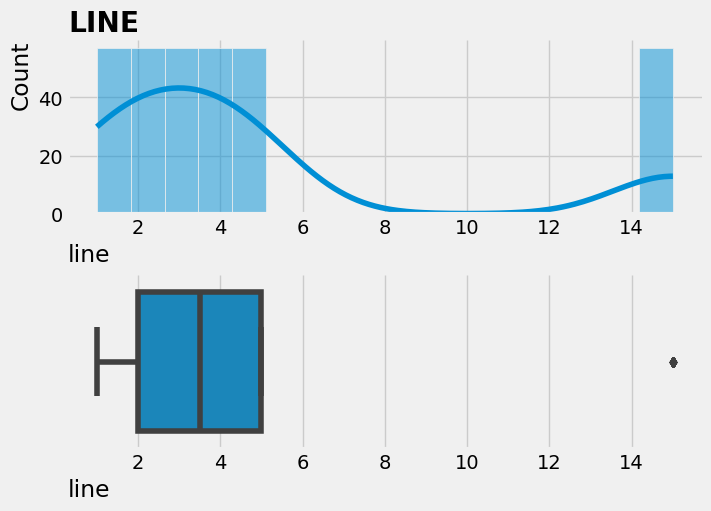

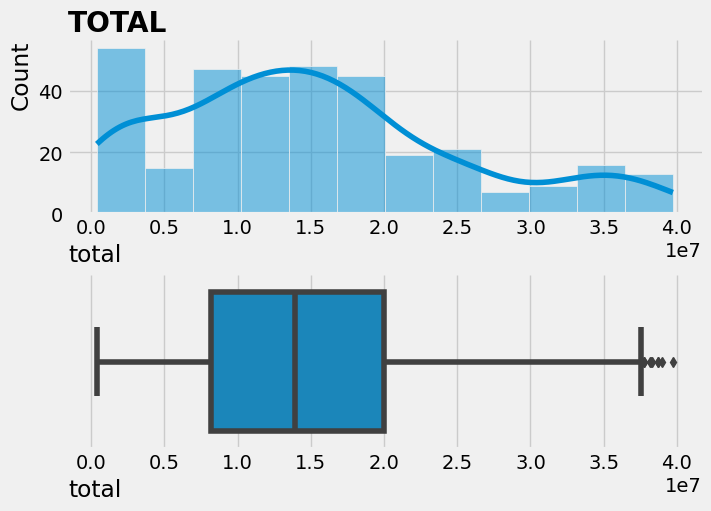

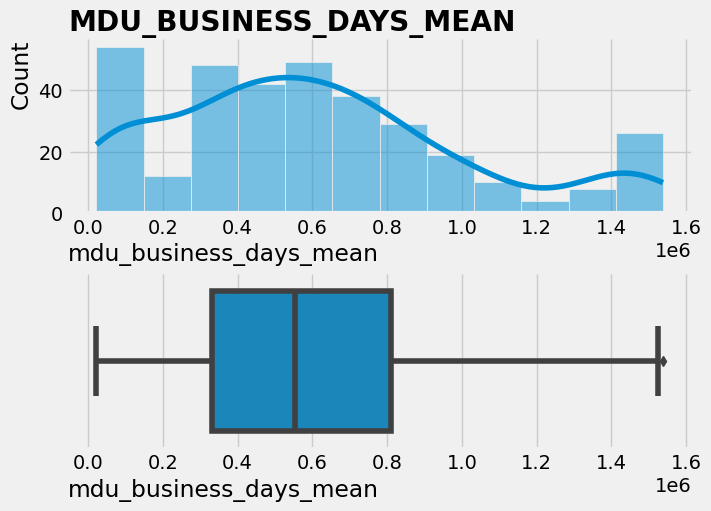

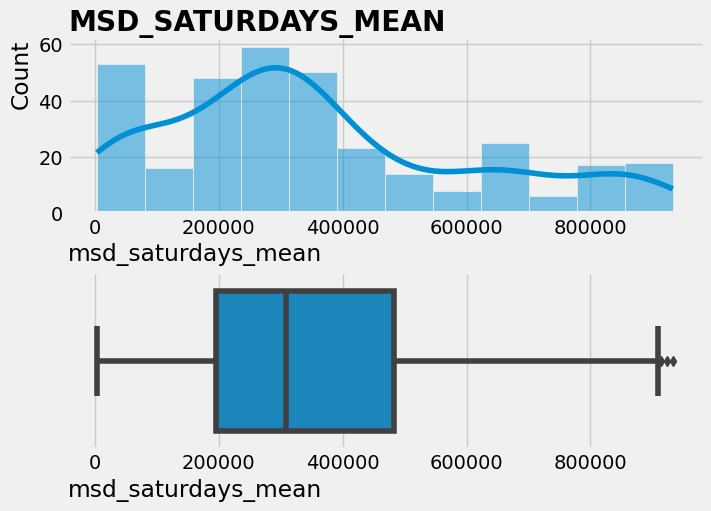

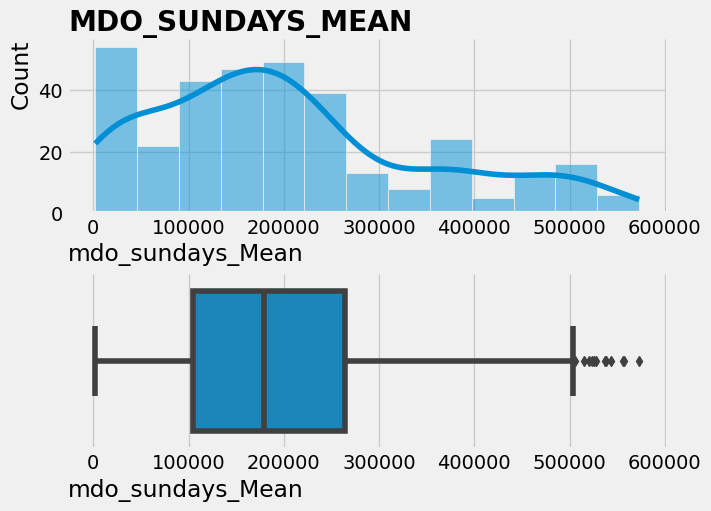

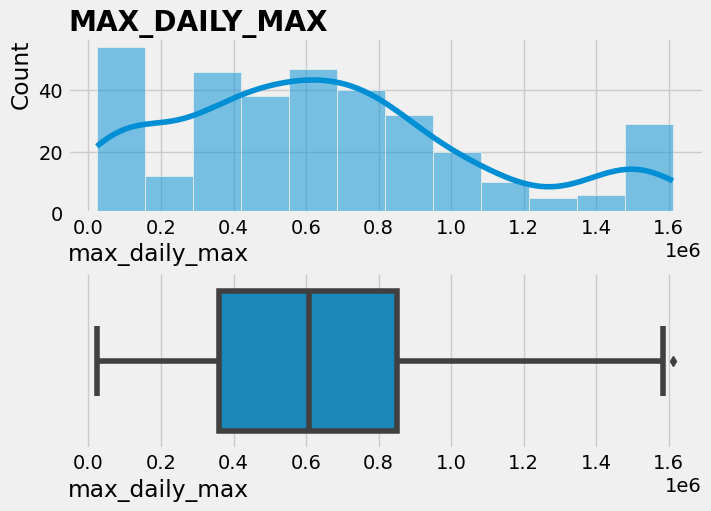

In [31]:
# iterate over numeric columns
for col in df_eda_num.columns.tolist():
    # create a figure object
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 5), constrained_layout=True)

    # plot histogram and boxplot
    sns.histplot(x=col, data=df_eda_num, kde=True, ax=axs[0])
    sns.boxplot(x=col, data=df_eda_num, ax=axs[1])
    # define plot details
    axs[0].set_title(f"{col.upper()}")
    plt.show()

### 5.2.2 - Categorical Columns

In [32]:
# iterate over categorical columns
for col in df_eda_str.columns.tolist():
    # create a figure object
    fig = plt.figure(figsize=(7, 5))

    # plot histogram and boxplot
    sns.barplot(x=col, data=df_eda_str)
    # define plot details
    plt.title(f"{col.upper()}")
    plt.show()

### 5.2.3 Datetime Columns

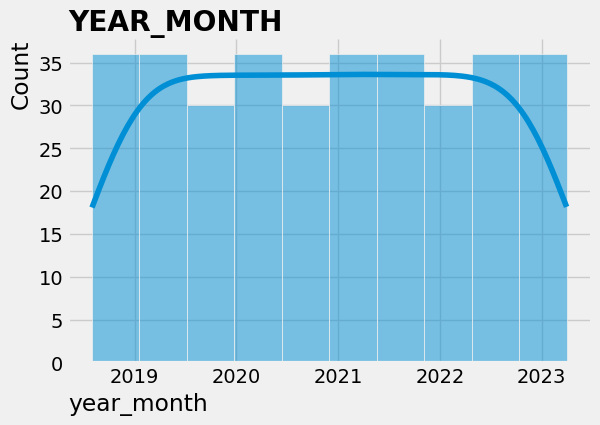

In [38]:
# iterate over numeric columns
for col in df_eda_date.columns.tolist():
    # create a figure object
    fig = plt.figure(figsize=(6, 4))
    # plot histogram and boxplot
    sns.histplot(x=col, data=df_eda_date, kde=True)
    # define plot details
    plt.title(f"{col.upper()}")
    plt.show()

## 5.3 - Bivariate Analysis

*Explore relationship between variables (in pairs)*

### 5.3.1 - Initial inspection

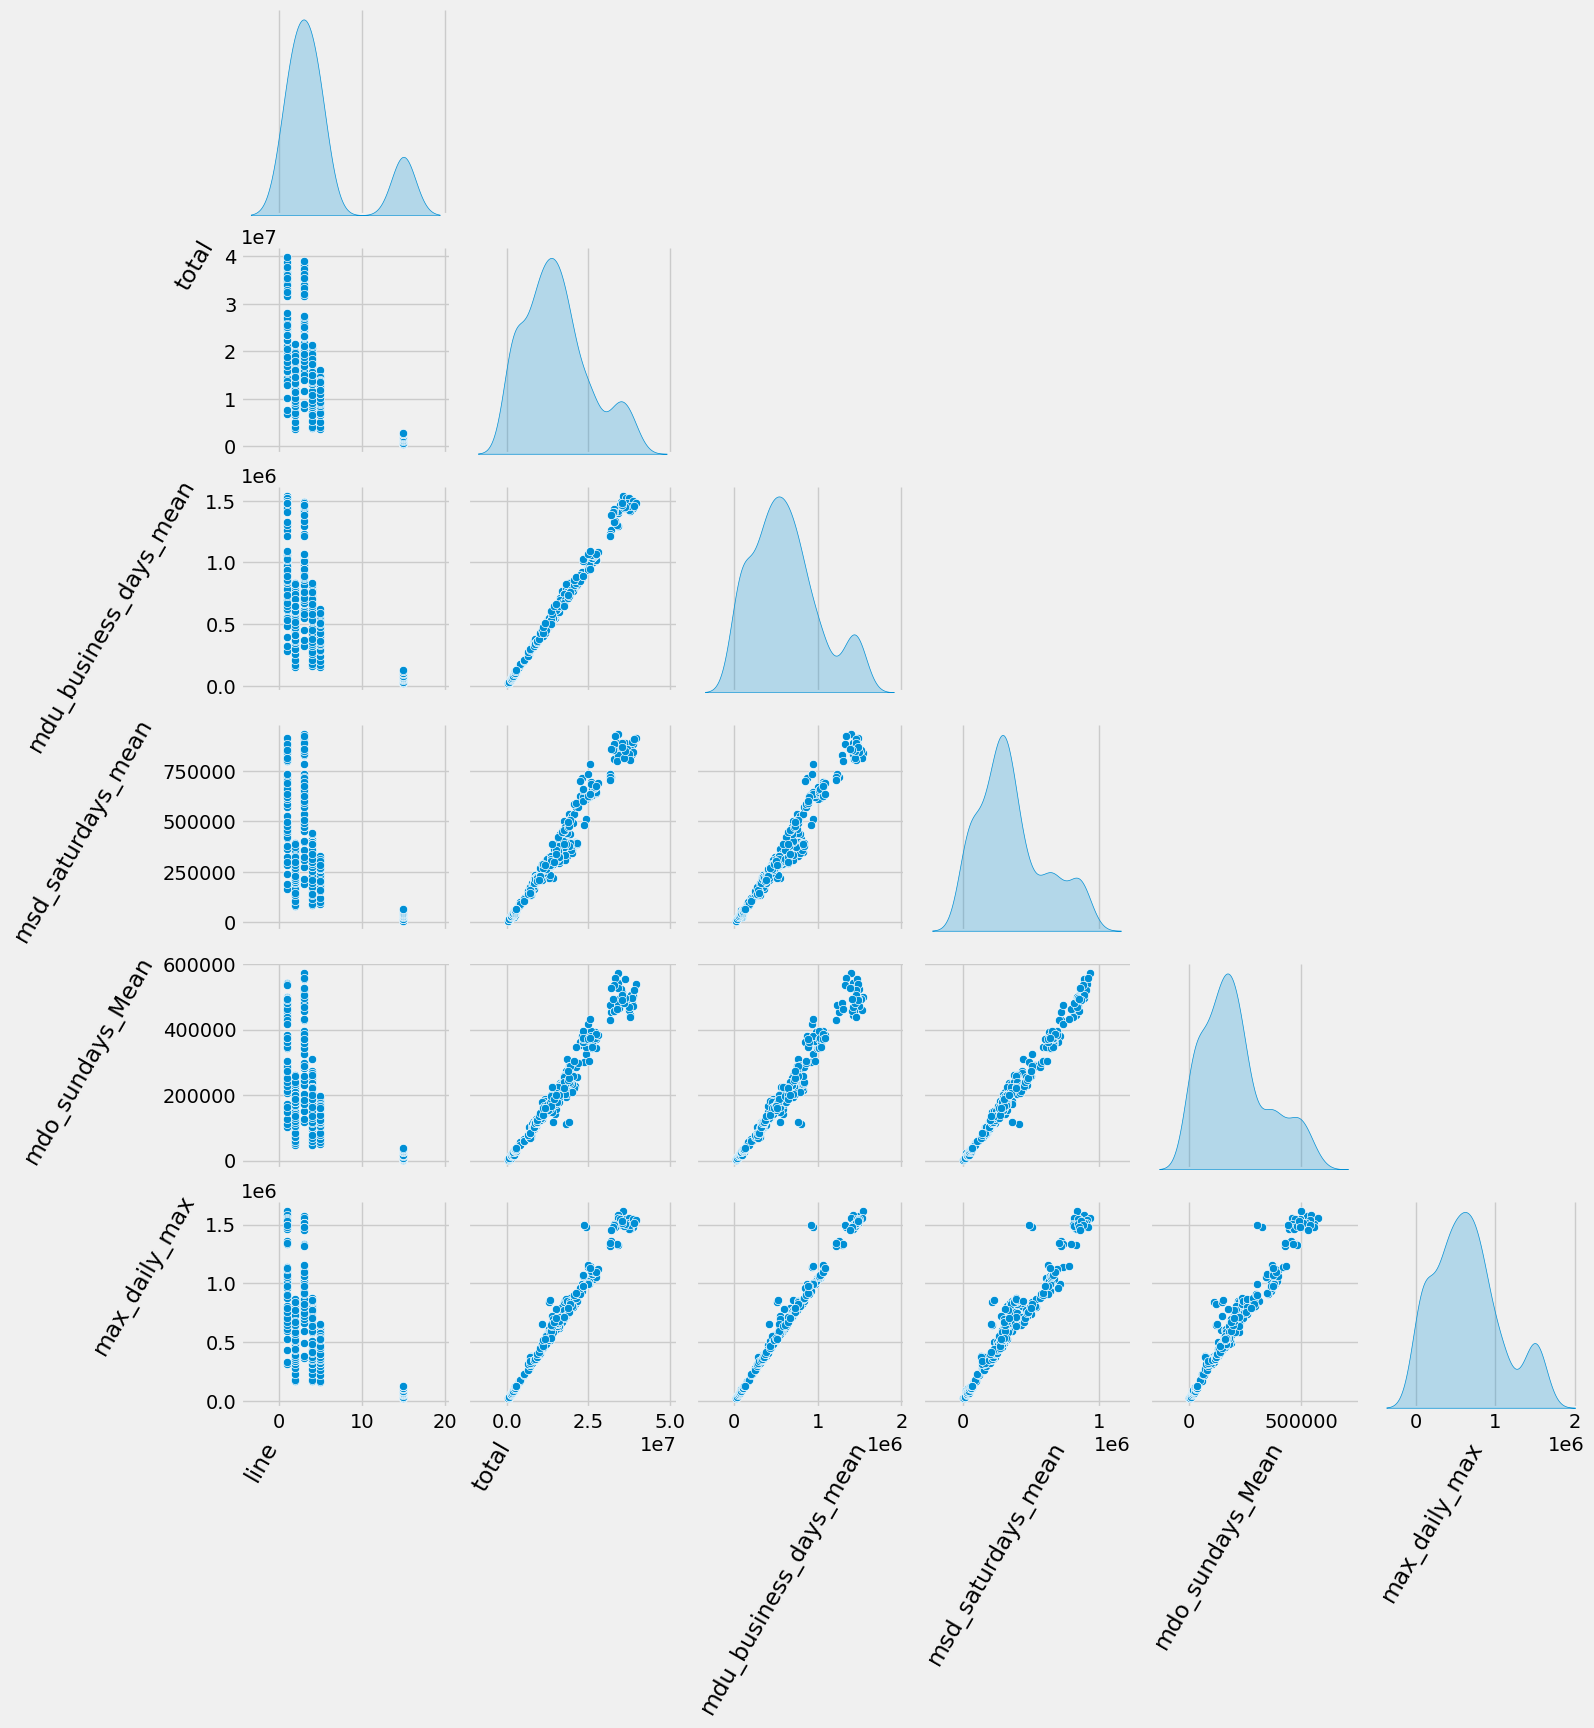

In [53]:
# plot pairplot
g = sns.pairplot(df_eda, diag_kind = "kde", corner=True);

# define plot details
for ax in g.axes.flatten():
    # try to rotate axis
    try:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 60)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 60)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')
    # errors due to ax is None
    except:
        # skip
        pass

### 5.3.2 - Numerical variables

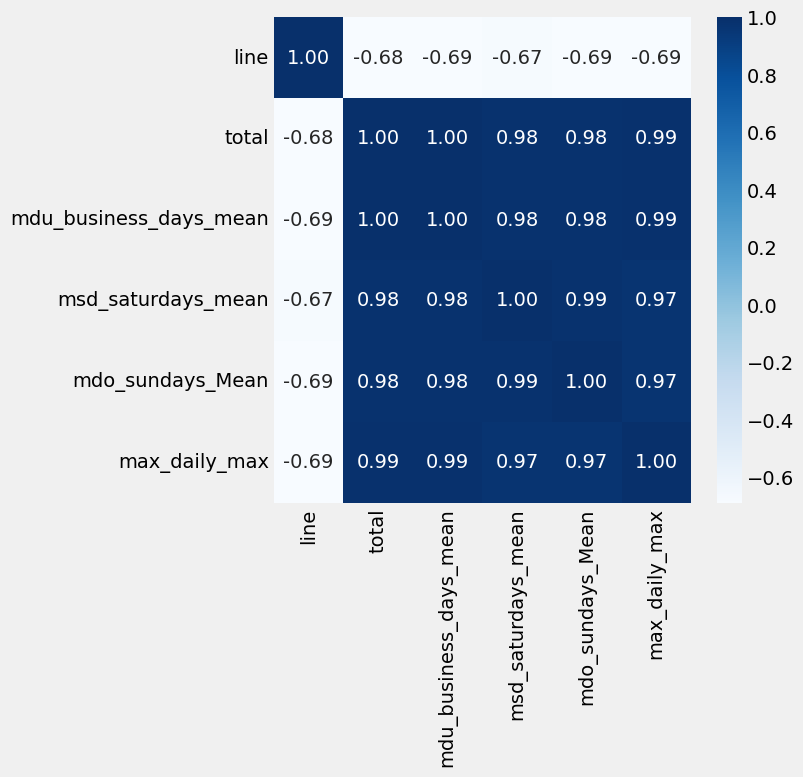

In [54]:
# calculate pearson correlation coefficient
correlation = df_eda_num.corr( method = 'spearman' )

# create figure and ax object
fig, ax = plt.subplots( figsize = (6, 6) )

# display heatmap of correlation on figure
sns.heatmap( correlation, annot = True, fmt=".2f", cmap="Blues")
plt.yticks( rotation = 0 );

### 5.3.3 - Categorical variables

In [ ]:
# No categorical variable yet

## 5.4 - Business Hypothesis

*Validate all business hypothesis based on available data*

### **H1. ..**

### **H2. ..**

### **H3. ..**

### **H4. ..**

### **H5. ..**

# **6 - DATA PREPARATION**

## 6.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [55]:
# create a restore point for the previous section dataframe
df_prep = df_eda.copy()

# check dataframe
df_prep

,year_month,line,total,mdu_business_days_mean,msd_saturdays_mean,mdo_sundays_Mean,max_daily_max
0,2018-08-01,3,"38,679,000.000","1,440,000.000","884,000.000","504,000.000","1,483,000.000"
1,2018-08-01,1,"37,775,000.000","1,420,000.000","832,000.000","446,000.000","1,466,000.000"
2,2018-08-01,15,"516,000.000","22,000.000",NaN,"2,000.000","23,000.000"
3,2018-08-01,2,"18,164,000.000","701,000.000","318,000.000","194,000.000","723,000.000"
4,2018-08-01,5,"7,220,000.000","309,000.000","176,000.000","85,000.000","322,000.000"
...,...,...,...,...,...,...,...
337,2023-04-01,2,"14,544,000.000","649,000.000","299,000.000","189,000.000","671,000.000"
338,2023-04-01,4,"15,070,570.000","661,450.000","338,300.000","201,580.000","701,710.000"
339,2023-04-01,5,"11,792,220.000","510,810.000","282,420.000","160,710.000","527,250.000"
340,2023-04-01,1,"25,545,000.000","1,091,000.000","639,000.000","375,000.000","1,130,000.000"


## 6.2 - Remove variables that won't be available in the production environment

*Remove variables that model can use on production to make predictions*

In [56]:
# No need for this first iteration

## 6.3 - Train-Validation-Test split

*Split dataframe into training, validation and test dataset*

In [57]:
# No need for this first iteration

## 6.4 - Scale numeric features

*Scale numeric feature to make modelling "easier" for ML models*

### 6.4.1 - Standard Scaler

In [ ]:
# No need for this first iteration

### 6.4.2 - Min-Max Scaler

In [ ]:
# No need for this first iteration

### 6.4.3 - Robust Scaler

In [ ]:
# No need for this first iteration

### 6.4.4 - Discretization

In [ ]:
# No need for this first iteration

## 6.5 - Encode categorical features

*Encode categorical feature to make modelling possible for ML models*

### 6.5.1 - One-Hot Encodingm

In [ ]:
# No need for this first iteration

### 6.5.2 - Ordinal Encoding

In [ ]:
# No need for this first iteration

### 6.5.3 - Target Encoding

In [ ]:
# No need for this first iteration

## 6.6 - Response variable transformation

*Transform target variable (e.g. log, sqrt, etc) to make modelling "easier" for ML models*

In [ ]:
# No need for this first iteration

## 6.7 - Cyclic variables transformation

*Transform cyclic variables (e.g. days of week, months in year, etc) with a sin and cos functions*

In [ ]:
# No need for this first iteration

## 6.8 - Double-check preparation

*Double-check the prepared dataset to make sure it is as expected*

In [ ]:
# No need for this first iteration

# **7 - FEATURE SELECTION**

## 7.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [58]:
# create a restore point for the previous section dataframe
df_f_selection = df_prep.copy()

# check dataframe
df_f_selection

,year_month,line,total,mdu_business_days_mean,msd_saturdays_mean,mdo_sundays_Mean,max_daily_max
0,2018-08-01,3,"38,679,000.000","1,440,000.000","884,000.000","504,000.000","1,483,000.000"
1,2018-08-01,1,"37,775,000.000","1,420,000.000","832,000.000","446,000.000","1,466,000.000"
2,2018-08-01,15,"516,000.000","22,000.000",NaN,"2,000.000","23,000.000"
3,2018-08-01,2,"18,164,000.000","701,000.000","318,000.000","194,000.000","723,000.000"
4,2018-08-01,5,"7,220,000.000","309,000.000","176,000.000","85,000.000","322,000.000"
...,...,...,...,...,...,...,...
337,2023-04-01,2,"14,544,000.000","649,000.000","299,000.000","189,000.000","671,000.000"
338,2023-04-01,4,"15,070,570.000","661,450.000","338,300.000","201,580.000","701,710.000"
339,2023-04-01,5,"11,792,220.000","510,810.000","282,420.000","160,710.000","527,250.000"
340,2023-04-01,1,"25,545,000.000","1,091,000.000","639,000.000","375,000.000","1,130,000.000"


## 7.2 - Logist regression coefficients

In [ ]:
# No need for this first iteration

## 7.3 - Random forest feature importance

In [ ]:
# No need for this first iteration

## 7.4 - Boruta algorithm

In [ ]:
# No need for this first iteration

## 7.5 - Mutual information

In [ ]:
# No need for this first iteration

# **8 - ML MODEL TRAINING**

## 8.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_train = df_f_selection.copy()

# check dataframe
df_train

## 8.2 - Metrics

*Define the metric of success and the health metrics*

**Metrics**
- Mean Error (ME)
- Mean Percentage Error (MPE)
- Mean Absolute Error (MAE)
- Mean Absolute Percentage Error (MAPE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Root Mean Squared Logarithmix Error (RMSLE)

**Main metric**
- MAPE

**Health metrics**
- MPE
- MAE
- RMSE
- RMSLE

## 8.3 - Baseline model

*Check the performance metrics with a dummy model to get the baseline metric*

In [ ]:
# TO-DO

## 8.4 - ML models

*Get performance metrics of ML model with cross-validation*

In [ ]:
# TO-DO

## 8.5 - Final modelling comparison

*Compare all models and decide what one is the best (and will be fine-tuned)*

In [ ]:
# TO-DO

# **9 - HYPERPARAMETER TUNNING**

## 9.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_tune = df_train.copy()

# check dataframe
check_dataframe( df_tune )

## 9.2 - Hypertune the best ML model

*Check the best hyperparams for the best ML model*

### 9.2.1 - Grid Search

In [ ]:
# TO-DO

### 9.2.2 - Random Search

In [ ]:
# TO-DO

### 9.2.3 - Bayesian Search

In [ ]:
# TO-DO

## 9.3 - Define best hyperparameters

*Explicitly define best hyper parameters*

In [ ]:
# TO-DO

# **10 - PERFORMANCE EVALUATION AND INTERPRETATION**

## 10.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_perform = df_tune.copy()

# check dataframe
check_dataframe( df_perform )

## 10.2 - Training Performance

*Get final model performance on training data*

In [ ]:
# TO-DO

## 10.3 - Generalization performance

### 10.3.1 - Final model training

*Get final model performance on validation data*

In [ ]:
# TO-DO

### 10.3.2 - Error analysis

*Perform error analysis on final model to make sure it is ready for production*

In [ ]:
# TO-DO

## 10.4 - Define prodution model

*Train ML on "training + validation" data*

In [ ]:
# TO-DO

## 10.5 - Testing performance

*Get production model performance on testing data*

In [ ]:
# TO-DO

## 10.6 - Business performance

*Translate testing performance into business results*

In [ ]:
# TO-DO

# **11 - DEPLOYMENT**

![Deployment architecture](../img/....jpg)

## 11.1 - API creation

*Code to create API for ML predictions*

In [ ]:
# TO-DO

## 11.2 - Docker container

*Code to create a Docker container and deploy ML model*

In [ ]:
# TO-DO